In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [5]:
df=pd.read_csv("NFLX.csv")

In [6]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2002-05-23,1.156429,1.242857,1.145714,1.196429,1.196429,104790000
1,2002-05-24,1.214286,1.225000,1.197143,1.210000,1.210000,11104800
2,2002-05-28,1.213571,1.232143,1.157143,1.157143,1.157143,6609400
3,2002-05-29,1.164286,1.164286,1.085714,1.103571,1.103571,6757800
4,2002-05-30,1.107857,1.107857,1.071429,1.071429,1.071429,10154200
...,...,...,...,...,...,...,...
4869,2021-09-24,592.500000,592.979980,583.640015,592.390015,592.390015,2124800
4870,2021-09-27,587.950012,593.580017,576.929993,592.640015,592.640015,2504700
4871,2021-09-28,589.000000,599.539978,580.159973,583.849976,583.849976,4431100
4872,2021-09-29,589.010010,609.880005,588.010010,599.059998,599.059998,6221000


In [7]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2002-05-23,1.156429,1.242857,1.145714,1.196429,1.196429,104790000
1,2002-05-24,1.214286,1.225000,1.197143,1.210000,1.210000,11104800
2,2002-05-28,1.213571,1.232143,1.157143,1.157143,1.157143,6609400
3,2002-05-29,1.164286,1.164286,1.085714,1.103571,1.103571,6757800
4,2002-05-30,1.107857,1.107857,1.071429,1.071429,1.071429,10154200


In [8]:
sns.set(rc={'figure.figsize':(10,5)})

In [9]:
df['Date']=pd.to_datetime(df['Date'])
df=df.set_index('Date')
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2002-05-23,1.156429,1.242857,1.145714,1.196429,1.196429,104790000
2002-05-24,1.214286,1.225000,1.197143,1.210000,1.210000,11104800
2002-05-28,1.213571,1.232143,1.157143,1.157143,1.157143,6609400
2002-05-29,1.164286,1.164286,1.085714,1.103571,1.103571,6757800
2002-05-30,1.107857,1.107857,1.071429,1.071429,1.071429,10154200


Text(0.5, 1.0, 'volume of stock versus time')

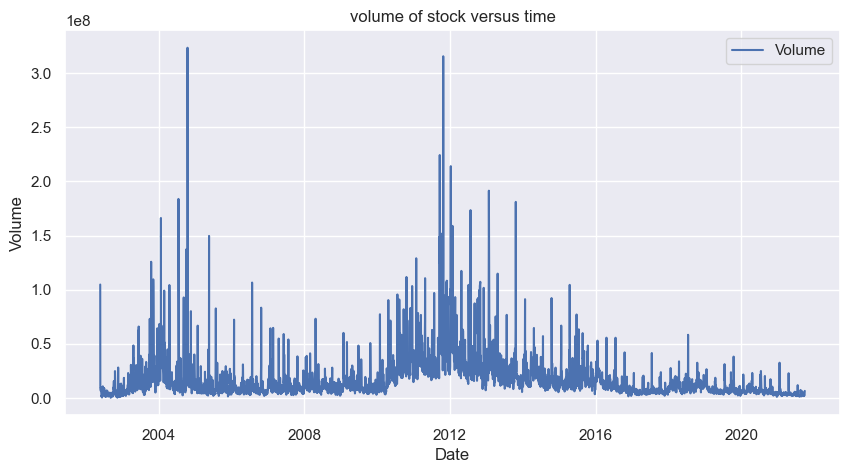

In [11]:
sns.lineplot(x=df.index,y=df['Volume'],label='Volume')
plt.title('volume of stock versus time')

<Axes: title={'center': 'Netflix Stock price'}, xlabel='Date'>

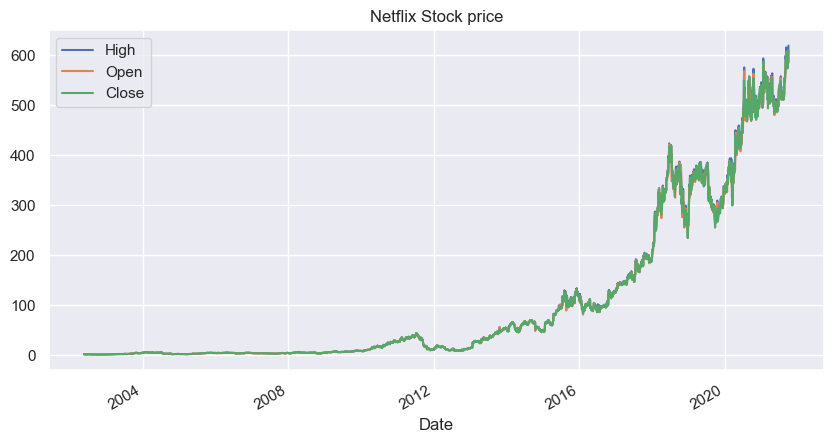

In [14]:
df.plot(y=['High','Open','Close'],title='Netflix Stock price')


<Axes: xlabel='year'>

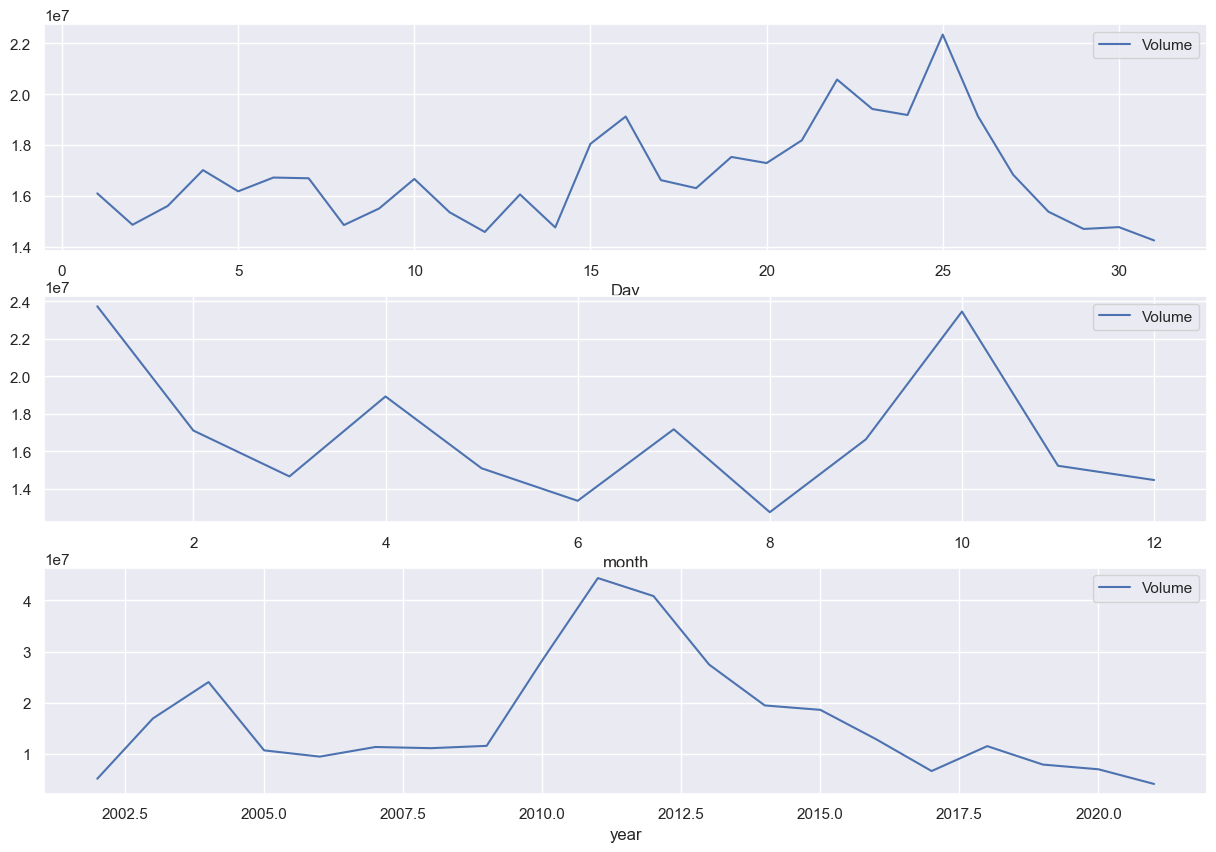

In [23]:
fig,(ax1,ax2,ax3)=plt.subplots(3,figsize=(15,10))
df.groupby(df.index.day).mean().plot(y='Volume',ax=ax1,xlabel='Day')
df.groupby(df.index.month).mean().plot(y='Volume',ax=ax2,xlabel='month')
df.groupby(df.index.year).mean().plot(y='Volume',ax=ax3,xlabel='year')

# Dates with Highest Stock price

In [24]:
a=df.sort_values(by='High',ascending=False).head(5)

In [25]:
a

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-09-30,608.049988,619.000000,608.049988,610.340027,610.340027,6612600
2021-09-08,603.840027,615.599976,595.710022,606.049988,606.049988,5424500
2021-09-07,594.690002,613.849976,593.989990,606.710022,606.710022,5821400
2021-09-29,589.010010,609.880005,588.010010,599.059998,599.059998,6221000
2021-09-10,598.159973,609.450012,593.669983,598.719971,598.719971,3948000


In [27]:
b=df.sort_values(by="Low",ascending=True).head(5)

In [28]:
b

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2002-10-10,0.377857,0.525000,0.346429,0.506429,0.506429,13577200
2002-10-09,0.410000,0.410714,0.347143,0.372857,0.372857,5982200
2002-10-07,0.450000,0.458571,0.382143,0.412143,0.412143,15724800
2002-10-08,0.410714,0.427857,0.390714,0.405000,0.405000,4531800
2002-10-16,0.529286,0.532857,0.442857,0.459286,0.459286,5800200


<Axes: xlabel='Date', ylabel='Low'>

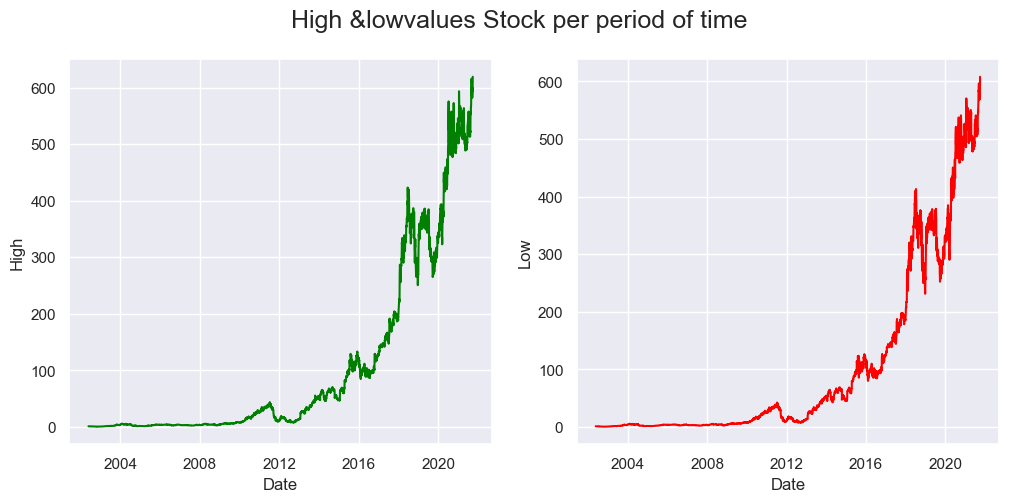

In [31]:
fig,axes=plt.subplots(nrows=1,ncols=2,sharex=True,figsize=(12,5))
fig.suptitle("High &lowvalues Stock per period of time",fontsize=18)
sns.lineplot(ax=axes[0],y=df['High'],x=df.index,color='green')
sns.lineplot(ax=axes[1],y=df['Low'],x=df.index,color='Red')